In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
colormap = 'viridis'
import math

In [141]:
def visulize_array(array, name):
    # Check array is 1d
    if array.ndim == 1:
        array = np.array([array])
    
    column_num = array.shape[1]
    fig, ax = plt.subplots(figsize=(column_num*0.8,column_num))
    
    im = ax.imshow(array, cmap=colormap)
    
    # Plot numbers inside array squares 
    for row in range(array.shape[0]):
        for col in range(array.shape[1]):
            text = ax.text(col, row, array[row, col],ha="center", va="center", color="w", fontsize=15)
            text.set_path_effects([path_effects.Stroke(linewidth=0, foreground='black'),
                                   path_effects.withStroke()])
    
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xticks(np.arange(array.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(array.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    ax.set_title(name, fontsize=12)
    plt.xlabel(array.shape,fontsize=12)
    #fig.tight_layout()
    plt.show()

In [185]:
def visulize_multiplication(matrices, names):

    if matrices[0].shape[1] != matrices[1].shape[0]:
        raise ValueError(f'shapes {matrices[0].shape} and {matrices[1].shape} are not aligned')
        
    if (matrices[0].shape[0],matrices[1].shape[1]) != matrices[2].shape:
        raise ValueError(f'{names[2]} should have shape {(matrices[0].shape[0],matrices[1].shape[1])}'\
                         f' not shape {matrices[2].shape}')
    
    # The gridspec_kw = {'width_ratios': ... } scales the width of the plots to have 
    # the correct width with the repect to number of colums there are in the matrix
    min_columns = np.min(np.array([matrices[0].shape[1], matrices[1].shape[1], matrices[2].shape[1]]))
    total_column_n = matrices[0].shape[1] + matrices[1].shape[1] + matrices[2].shape[1]

    fig, ax = plt.subplots(1,3, gridspec_kw = {'width_ratios':[matrices[0].shape[1]-min_columns+1,    
                                                               matrices[1].shape[1]-min_columns+1,    
                                                               matrices[2].shape[1]-min_columns+1]},
                          figsize=(total_column_n*0.8,10))   
    
    for i, matrix in enumerate(matrices):
        im = ax[i].imshow(matrix, cmap=colormap)
        # Plot numbers inside matrix squares 
        for row in range(matrix.shape[0]):
            for col in range(matrix.shape[1]):
                text = ax[i].text(col, row, matrix[row, col],ha="center", va="center", color="w", fontsize=15)
                text.set_path_effects([path_effects.Stroke(linewidth=0, foreground='black'),
                                       path_effects.withStroke()])
        
        # Turn off tick labels
        ax[i].set_yticklabels([])
        ax[i].set_xticklabels([])
        ax[i].xaxis.set_ticks_position('none') 
        ax[i].yaxis.set_ticks_position('none') 
        
        # Turn spines off and create white grid.
        for edge, spine in ax[i].spines.items():
            spine.set_visible(False)
        ax[i].set_xticks(np.arange(matrix.shape[1]+1)-.5, minor=True)
        ax[i].set_yticks(np.arange(matrix.shape[0]+1)-.5, minor=True)
        ax[i].grid(which="minor", color="w", linestyle='-', linewidth=2)
        ax[i].tick_params(which="minor", bottom=False, left=False)
        
        # Write on axis
        ax[i].set_title(names[i], fontsize=12)
        ax[i].set_xlabel(matrix.shape,fontsize=12)
        if i == 1:
            ax[i].set_ylabel("•",fontsize=20, y = 0.52)
        if i == 2:
            ax[i].set_ylabel('=',fontsize=20, rotation=0, labelpad=15, y = 0.40)
            
    figsize=(1,1)
    fig.tight_layout()
    plt.show()

## Creating arrays and matrices

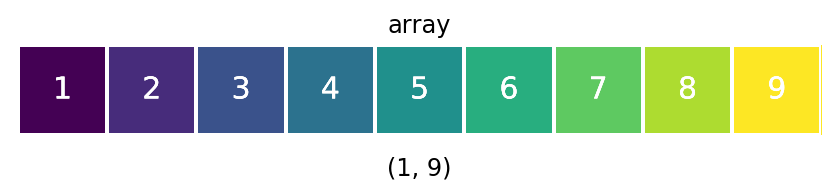

In [186]:
# 1d array
array = np.array([1,2,3,4,5,6,7,8,9])
visulize_array(array, 'array')

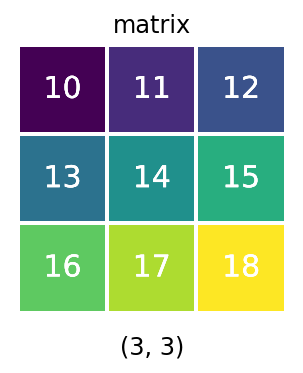

In [187]:
# 2d array aka. a matrix
matrix = np.array([[10,11,12],[13,14,15], [16,17,18]])
visulize_array(matrix, 'matrix')

## Basic operations
### Find min and max values

In [188]:
array = np.array([1,2,3,4,5,6,7,8,9])
matrix = np.array([[10,11,12],[13,14,15], [16,17,18]])

min_array_val = np.min(array)
max_array_val = np.max(array)
min_matrix_val = np.min(matrix)
max_matrix_val = np.max(matrix)
print(f'min_array_val: {min_array_val}')
print(f'max_array_val: {max_array_val}')
print(f'min_matrix_val: {min_matrix_val}')
print(f'max_matrix_val: {max_matrix_val}')

min_array_val: 1
max_array_val: 9
min_matrix_val: 10
max_matrix_val: 18


## Matrix multiplication

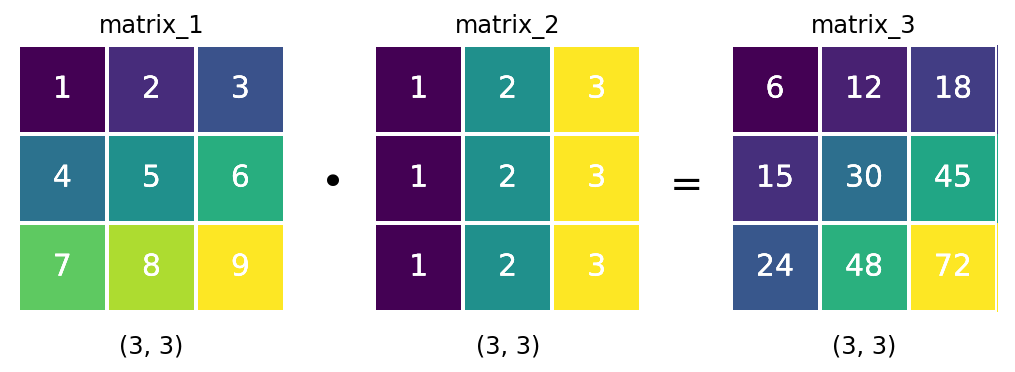

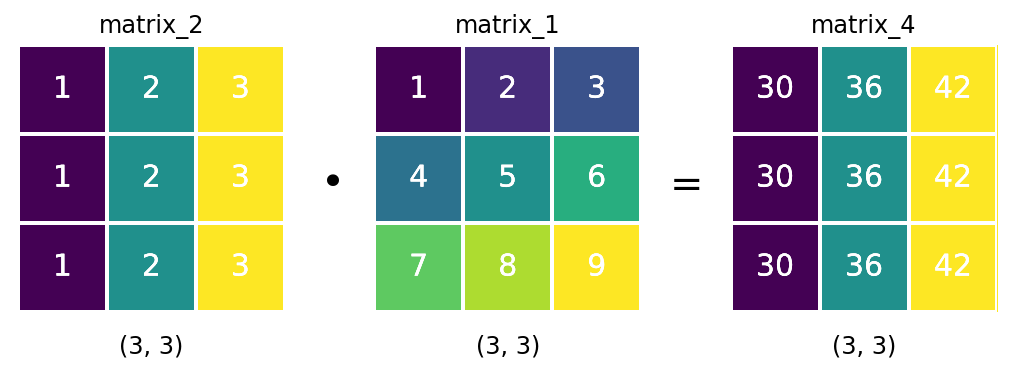

In [189]:
matrix_1 = np.array([[1,2,3],[4,5,6], [7,8,9]])
matrix_2 = np.array([[1,2,3],[1,2,3], [1,2,3]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrix_4 = np.dot(matrix_2,matrix_1)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']
matrices_2 = [matrix_2, matrix_1, matrix_4]
names_2 = ['matrix_2', 'matrix_1', 'matrix_4']

visulize_multiplication(matrices_1, names_1)
visulize_multiplication(matrices_2, names_2)

(2, 3)


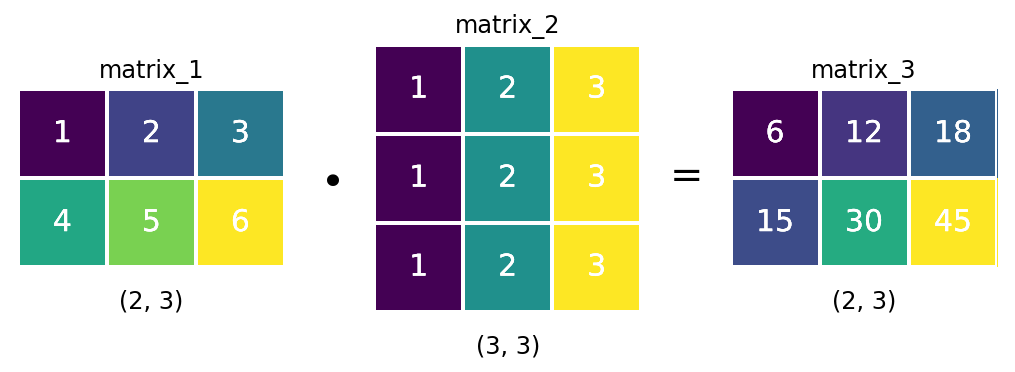

In [190]:
matrix_1 = np.array([[1,2,3],[4,5,6]])
print(matrix_1.shape)
matrix_2 = np.array([[1,2,3],[1,2,3], [1,2,3]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']

visulize_multiplication(matrices_1, names_1)

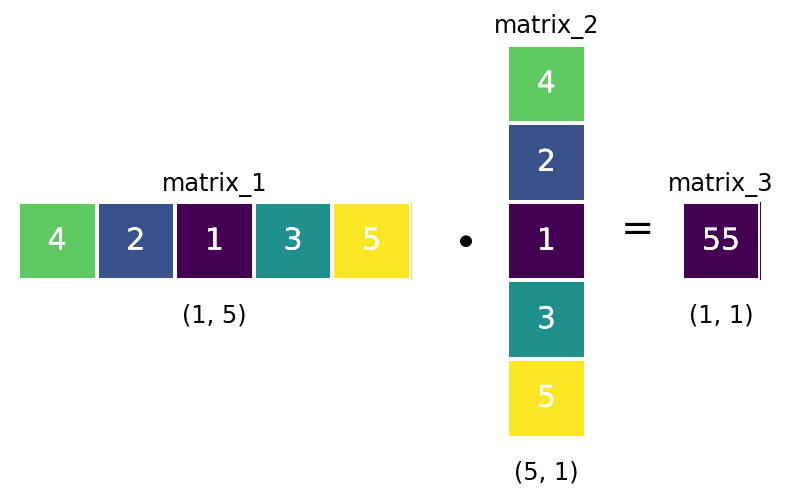

In [191]:
matrix_1 = np.array([[4,2,1,3,5]])
matrix_2 = np.array([[4],[2], [1], [3], [5]])
matrix_3 = np.dot(matrix_1,matrix_2)
matrices_1 = [matrix_1, matrix_2, matrix_3]
names_1 = ['matrix_1', 'matrix_2', 'matrix_3']

visulize_multiplication(matrices_1, names_1)

# Slicing and Indexing
Read about all about slicing and indexing [here](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html). The bsic slice syntax is `i:j:k` where <i>i</i> is the statring index, <i>j</i> is the stopping index, and <i>k</i> is the step. 
### Example 1:

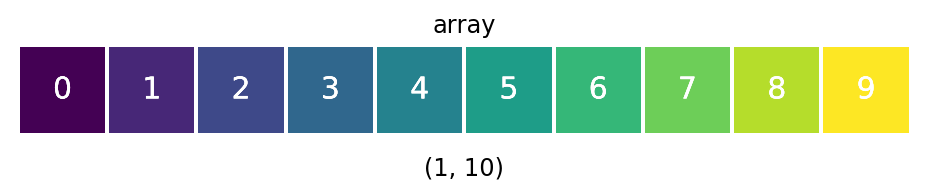

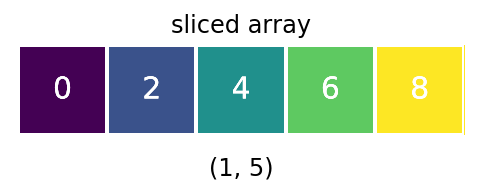

In [192]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
visulize_array(x, 'array')
start_index = 0
stop_index = 9
step = 2
visulize_array(x[start_index:stop_index:step], 'sliced array')